In [43]:
#coding=utf-8
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

In [44]:
# train = pd.read_csv('../data/stock50.csv')
# train = pd.read_csv('stock50.csv')
train = pd.read_csv('Google_Stock_Price_v2.csv')
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [45]:
df = train

df.drop(df.columns[[0,3,5]], axis=1, inplace=True) 

df['High'] = df['High'] 
df['Open'] = df['Open'] 
df['Close'] =df['Close'] 

df.tail(5)

,Open,High,Close
1144,790.90,792.74,789.91
1145,790.68,797.86,791.55
1146,793.70,794.23,785.05
1147,783.33,785.93,782.79
1148,782.75,782.78,771.82


In [46]:

df['High'] = df['High'] / 1000
df['Open'] = df['Open'] / 1000
df['Close'] = df['Close'].astype(float) / 1000

df.tail(5)

,Open,High,Close
1144,0.79090,0.79274,0.78991
1145,0.79068,0.79786,0.79155
1146,0.79370,0.79423,0.78505
1147,0.78333,0.78593,0.78279
1148,0.78275,0.78278,0.77182


In [47]:
import datetime

stock_name = 'Google'

today = datetime.date.today()
file_name = stock_name+'_stock_%s.csv' % today
df.to_csv(file_name)

In [48]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [49]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [58]:
window = 5
X_train, y_train, X_test, y_test = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1029, 5, 3)
y_train (1029,)
X_test (114, 5, 3)
y_test (114,)


C:\Users\user\Anaconda3\envs\myTensorFlow-Gpu-V2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
print("X_train", X_train[0])
print("y_train", y_train[0])


X_train [[0.78275 0.78278 0.77182]
 [0.78333 0.78593 0.78279]
 [0.7937  0.79423 0.78505]
 [0.79068 0.79786 0.79155]
 [0.7909  0.79274 0.78991]]
y_train 0.79126


In [51]:
model = build_model2([3,window,1])

C:\Users\user\Anaconda3\envs\myTensorFlow-Gpu-V2\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
C:\Users\user\Anaconda3\envs\myTensorFlow-Gpu-V2\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


In [52]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=500,
    validation_split=0.2,
    verbose=1)

C:\Users\user\Anaconda3\envs\myTensorFlow-Gpu-V2\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 823 samples, validate on 206 samples
Epoch 1/500
823/823 [==============================] - 2s 3ms/step - loss: 0.4712 - acc: 0.0000e+00 - val_loss: 0.5010 - val_acc: 0.0000e+00
Epoch 2/500
823/823 [==============================] - 0s 106us/step - loss: 0.4680 - acc: 0.0000e+00 - val_loss: 0.4972 - val_acc: 0.0000e+00
Epoch 3/500
823/823 [==============================] - 0s 104us/step - loss: 0.4638 - acc: 0.0000e+00 - val_loss: 0.4927 - val_acc: 0.0000e+00
Epoch 4/500
823/823 [==============================] - 0s 114us/step - loss: 0.4588 - acc: 0.0000e+00 - val_loss: 0.4870 - val_acc: 0.0000e+00
Epoch 5/500
823/823 [==============================] - 0s 104us/step - loss: 0.4526 - acc: 0.0000e+00 - val_loss: 0.4797 - val_acc: 0.0000e+00
Epoch 6/500
823/823 [==============================] - 0s 98us/step - loss: 0.4442 - acc: 0.0000e+00 - val_loss: 0.4700 - val_acc: 0.0000e+00
Epoch 7/500
823/823 [==============================] - 0s 99us/step - loss: 0.4329 - acc: 0.0000e+0

Epoch 58/500
823/823 [==============================] - 0s 93us/step - loss: 0.0153 - acc: 0.0000e+00 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 59/500
823/823 [==============================] - 0s 118us/step - loss: 0.0156 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 60/500
823/823 [==============================] - 0s 115us/step - loss: 0.0149 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 61/500
823/823 [==============================] - 0s 98us/step - loss: 0.0140 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 62/500
823/823 [==============================] - 0s 82us/step - loss: 0.0151 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 63/500
823/823 [==============================] - 0s 85us/step - loss: 0.0145 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 64/500
823/823 [==============================] - 0s 90us/step - loss: 0.0150 - acc: 0.0000e+00 - val_loss: 0.0070 - val_acc: 0.0000e+

823/823 [==============================] - 0s 102us/step - loss: 0.0029 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 116/500
823/823 [==============================] - 0s 98us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 117/500
823/823 [==============================] - 0s 104us/step - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 118/500
823/823 [==============================] - 0s 109us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 119/500
823/823 [==============================] - 0s 103us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 120/500
823/823 [==============================] - 0s 87us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 121/500
823/823 [==============================] - 0s 84us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Ep

Epoch 172/500
823/823 [==============================] - 0s 90us/step - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 173/500
823/823 [==============================] - 0s 84us/step - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 174/500
823/823 [==============================] - 0s 80us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 175/500
823/823 [==============================] - 0s 80us/step - loss: 0.0028 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 176/500
823/823 [==============================] - 0s 92us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 177/500
823/823 [==============================] - 0s 95us/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 178/500
823/823 [==============================] - 0s 90us/step - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0

Epoch 229/500
823/823 [==============================] - 0s 93us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 230/500
823/823 [==============================] - 0s 88us/step - loss: 0.0025 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 231/500
823/823 [==============================] - 0s 81us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 232/500
823/823 [==============================] - 0s 82us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 233/500
823/823 [==============================] - 0s 85us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 234/500
823/823 [==============================] - 0s 87us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 235/500
823/823 [==============================] - 0s 101us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.

Epoch 286/500
823/823 [==============================] - 0s 84us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 287/500
823/823 [==============================] - 0s 81us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 288/500
823/823 [==============================] - 0s 93us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 289/500
823/823 [==============================] - 0s 92us/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 290/500
823/823 [==============================] - 0s 95us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.3387e-04 - val_acc: 0.0000e+00
Epoch 291/500
823/823 [==============================] - 0s 91us/step - loss: 0.0027 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 292/500
823/823 [==============================] - 0s 90us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc:

823/823 [==============================] - 0s 91us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 343/500
823/823 [==============================] - 0s 88us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 344/500
823/823 [==============================] - 0s 90us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 7.3749e-04 - val_acc: 0.0000e+00
Epoch 345/500
823/823 [==============================] - 0s 86us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 346/500
823/823 [==============================] - 0s 93us/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 347/500
823/823 [==============================] - 0s 90us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 6.6607e-04 - val_acc: 0.0000e+00
Epoch 348/500
823/823 [==============================] - 0s 86us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0012 - val_acc: 0.0000e+0

823/823 [==============================] - 0s 107us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 6.3976e-04 - val_acc: 0.0000e+00
Epoch 399/500
823/823 [==============================] - 0s 91us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 7.7769e-04 - val_acc: 0.0000e+00
Epoch 400/500
823/823 [==============================] - 0s 90us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 401/500
823/823 [==============================] - 0s 86us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 6.1831e-04 - val_acc: 0.0000e+00
Epoch 402/500
823/823 [==============================] - 0s 92us/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 7.6791e-04 - val_acc: 0.0000e+00
Epoch 403/500
823/823 [==============================] - 0s 108us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 404/500
823/823 [==============================] - 0s 108us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 4.9181e-04 - val

823/823 [==============================] - 0s 96us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.4185e-04 - val_acc: 0.0000e+00
Epoch 454/500
823/823 [==============================] - 0s 91us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 6.0058e-04 - val_acc: 0.0000e+00
Epoch 455/500
823/823 [==============================] - 0s 98us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 7.6415e-04 - val_acc: 0.0000e+00
Epoch 456/500
823/823 [==============================] - 0s 84us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 8.5254e-04 - val_acc: 0.0000e+00
Epoch 457/500
823/823 [==============================] - 0s 88us/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 4.9568e-04 - val_acc: 0.0000e+00
Epoch 458/500
823/823 [==============================] - 0s 90us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 9.7714e-04 - val_acc: 0.0000e+00
Epoch 459/500
823/823 [==============================] - 0s 93us/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 6.0980e-04 

In [53]:
import math

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00 MSE (0.03 RMSE)
Test Score: 0.00 MSE (0.02 RMSE)


In [54]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

In [55]:
print(y_test)

[0.56296 0.55752 0.55955 0.56355 0.56694 0.57886 0.57665 0.57898 0.56885
 0.57701 0.56942 0.57927 0.58662 0.59271 0.58991 0.60201 0.60779 0.59916
 0.61243 0.59876 0.62134 0.62721 0.60944 0.60235 0.60357 0.61198 0.60748
 0.61111 0.60589 0.59534 0.60935 0.6056  0.60278 0.60319 0.6133  0.61378
 0.60805 0.59962 0.59596 0.59443 0.59766 0.60579 0.6079  0.60441 0.62289
 0.64923 0.63422 0.62514 0.62911 0.63059 0.63341 0.64086 0.64515 0.63948
 0.64663 0.65396 0.64525 0.64755 0.64083 0.64428 0.63823 0.63176 0.63224
 0.62333 0.61943 0.6143  0.61609 0.60349 0.59861 0.60548 0.60514 0.6033
 0.61257 0.61955 0.6207  0.61656 0.6167  0.60764 0.60823 0.60445 0.60628
 0.61232 0.60298 0.60486 0.6039  0.60809 0.61052 0.60425 0.60979 0.60818
 0.60511 0.60742 0.5947  0.58351 0.57924 0.57852 0.57611 0.57839 0.56654
 0.56793 0.57934 0.58392 0.58439 0.63782 0.63118 0.62686 0.62328 0.62792
 0.62425 0.62143 0.62076 0.64824 0.65721 0.66645]


In [56]:
print(p)

[[0.57815945]
 [0.5782491 ]
 [0.5822447 ]
 [0.57907355]
 [0.5717373 ]
 [0.56834364]
 [0.56808686]
 [0.57208115]
 [0.577003  ]
 [0.58146524]
 [0.5860475 ]
 [0.5841542 ]
 [0.5834018 ]
 [0.5812305 ]
 [0.5856087 ]
 [0.5872552 ]
 [0.59530723]
 [0.6014879 ]
 [0.60588026]
 [0.60899556]
 [0.6155485 ]
 [0.6177875 ]
 [0.6177093 ]
 [0.62344205]
 [0.62272155]
 [0.6308792 ]
 [0.6274133 ]
 [0.61820996]
 [0.616671  ]
 [0.61893976]
 [0.6211159 ]
 [0.6187057 ]
 [0.6180365 ]
 [0.6146414 ]
 [0.61325204]
 [0.61843175]
 [0.6170249 ]
 [0.6174468 ]
 [0.6198399 ]
 [0.6224947 ]
 [0.61893713]
 [0.6131917 ]
 [0.60868615]
 [0.6081042 ]
 [0.6098728 ]
 [0.61486506]
 [0.6216797 ]
 [0.6268959 ]
 [0.6338371 ]
 [0.64640325]
 [0.6526048 ]
 [0.6442244 ]
 [0.6421914 ]
 [0.6459169 ]
 [0.6491292 ]
 [0.65325093]
 [0.6577652 ]
 [0.65963936]
 [0.6596411 ]
 [0.6634172 ]
 [0.6639408 ]
 [0.6595986 ]
 [0.65838015]
 [0.6545158 ]
 [0.65262437]
 [0.64693797]
 [0.64206237]
 [0.6383515 ]
 [0.6318949 ]
 [0.62744164]
 [0.6231267 ]
 [0.61

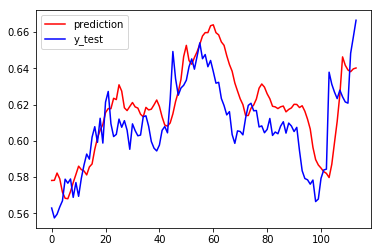

In [57]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()